In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hottochoosetest/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png
/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv
/kaggle/input/startup/50_Startups.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

warnings.filterwarnings('ignore')
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Introduction

**Motivation**: When we have a large number of predictors it might not all of them that are useful for our algorithm to learn their relationship with target. Moreover, having a large number of predictors can lead to overfit and take much more time to converge. Thus, it would be good if we could discard the bad predictors, the ones that are lack of explanatory power, and leave model only useful ones.<br>

To have a clear picture, consider the following example dataset.

In [3]:
example_1 = pd.DataFrame()

def my_func(x):
    return (5*x**3+10+np.random.uniform(low=0.1, high=5000))/10

example_1['Predictor_1'] = np.random.uniform(low=1, high=20, size=100)
example_1['Predictor_2'] = np.random.uniform(low=1, high=20, size=100)
example_1['Target'] = example_1['Predictor_1'].apply(my_func)

example_1

,Predictor_1,Predictor_2,Target
0,3.383190,13.160289,427.373998
1,6.028117,19.660346,538.681889
2,16.179873,17.570741,2519.422579
3,18.316871,19.576037,3293.497025
4,7.936826,14.088846,598.571191
...,...,...,...
95,6.666474,19.433170,580.525407
96,15.476010,2.522063,2201.934186
97,18.231277,17.313722,3207.573403
98,9.654637,6.490393,742.991400


I defined the example_1 DataFrame which have 2 continuous predictors('Predictor_1', 'Predictor_1') and one continuous target('Target').
We can clearly see their relationship in the scatterplot below. 

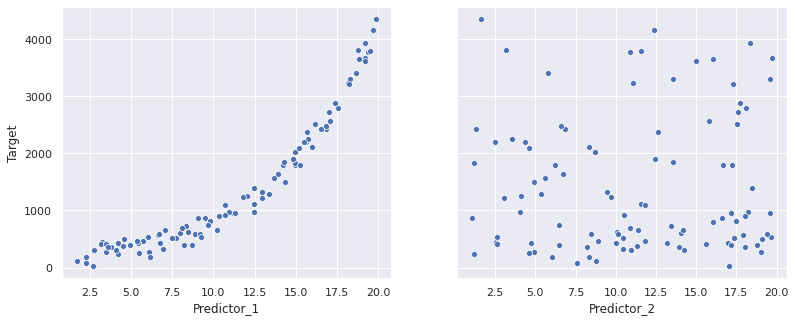

In [4]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(13,5)
sns.scatterplot(data=example_1, x='Predictor_1', y='Target', ax=ax[0])
sns.scatterplot(data=example_1, x='Predictor_2', y='Target', ax=ax[1])
plt.show()

When we see the relationships, the first thought is that 'Predictor_2' is useless in guessing the relationship between predictors and 'Target'. That said even we know 'Predictor_2' it doesn't seem to be helpful.  The question is, should we discard it?. <br>


The reason why we feel in that way is we visually see that 'Predictor_1' and 'Target' are highly correlated in someway. But not for 'Predictor_2', it seems to be a mess, random, and not related to'Target'. <br>

Let's see another example.

In [5]:
from scipy.stats import norm
example_2 = pd.DataFrame()

example_2['Gender'] = random.choices(['Male','Female'], k=100)
example_2['Graduated'] = random.choices(['Yes','No'], k=100)
example_2['Salary'] = norm.rvs(loc=1000,scale=50,size=100)
example_2['Salary'] =example_2.apply(lambda x:x[2]+100 if x[1]=='Yes' else x[2]-100, axis=1)

example_2

,Gender,Graduated,Salary
0,Female,No,843.115996
1,Female,Yes,1120.394596
2,Female,Yes,1066.266874
3,Female,Yes,1138.437681
4,Male,No,961.898460
...,...,...,...
95,Male,No,915.277639
96,Male,Yes,1060.132300
97,Male,Yes,1093.175149
98,Male,Yes,1161.422448


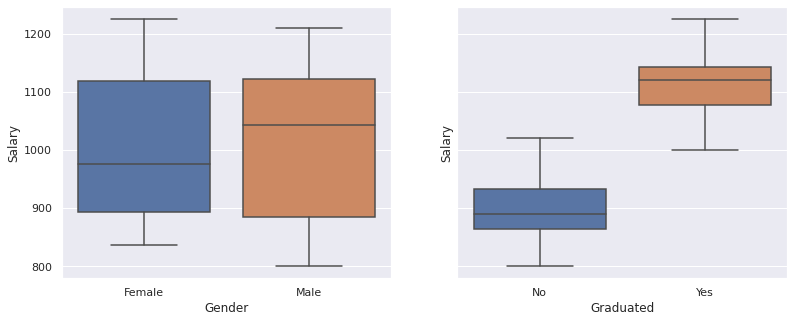

In [6]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(13, 5)
sns.boxplot(data=example_2, x='Gender', y='Salary', ax=ax[0])
sns.boxplot(data=example_2, x='Graduated', y='Salary', ax=ax[1])
plt.show()

In this case, the first thought is that 'Gender' makes no different in 'Salary'. That said, it's no matter that one is male or female, his/her salary is almost the same. But not for 'Graduated', we clearly see that if one is graduated, his/her salary is obviously much higher than who isn't. The question is, since 'Gender' make no differences, should we discard it?

If we carefully consider every single relationship between each predictor and target, we will definitely have our own guesses. <br>
But **"first thought or guessing"** are bad. It's not scientific. In this notebook, I'll try to illustrate some common methods that are more reliable, scientific than that.


---

# Feature selection <br>
is the process of reducing the number of input variables when developing a predictive model. The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models <br>
The techniques for feature selection in machine learning can be broadly classified into the following categories:<br>
1. **Filter methods** : These methods are more reliable methods I said earlier. They select subsets of features based on their relationship with the target using statistical test. Filter methods pick feature subset by not including any machine-learning algorithm. 
<!-- ![Alt Text](image path "title") -->
![Alt Text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png "Optional Title")

2. **Wrapper methods** : Different from the first ones, rather than using statistical test, these methods take advantages of machine-learning algorithms since many of them internally identify which predictors are good for performance. Wrapper method uses one machine learning algorithm and its performance to evaluate features' importance. This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the performance.
<!-- ![Alt Text](image path "title") -->
![Alt Text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png "Optional Title")


3. **Embedded methods** : Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.




---

# 1) Filter methods <br>
Let's first state the common data types:
- **Numerical Variables**: Integer, Floating point


- **Categorical Variables**
    - Boolean, Binary
    - Ordinal : Categories with implied order
    - Norminal : Named categories

**___SUMMARY OF FILTER METHODS** ___<br>

The following cases are all possible cases you might encounter when trying to build some predictive model.

## 1.1) Numerical Input, Numerical Output

- Pearson’s correlation coefficient (linear) -> [sklearn.feature_selection.f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html "sklearn doc")<br>
- Spearman’s rank coefficient (nonlinear)  -> [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

## 1.2) Numerical Input, Categorical Output

- ANOVA correlation coefficient (linear) -> [sklearn.feature_selection.f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html "Compute the ANOVA F-value for the provided sample.")<br>
- Kendall’s rank coefficient (nonlinear) -> [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)<br>

Note: Kendall does assume that the categorical variable is ordinal. <br>


## 1.3)Categorical Input, Categorical Output

- Chi-Squared test -> [sklearn.feature_selection.chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
- Mutual Information, Information gain -> [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) for a discrete target variable,  [sklearn.feature_selection.mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) for a continuous target variable. <br>

## 1.4) Categorical Input, Numerical Output
This is a regression problem with categorical input variables.
This is a strange example of a regression problem (e.g. you would not encounter it often). <br>

___

In this section, I'll show some examples for each case using 2 dataset.

### ""HR-Analytics" Dataset used for classification problem. <br>
- y_class : target variable of classification problem
- X_category_class : categorical predictors of classification problem
- X_numeric_class : numerical predictors of classification problem

Note: for X_category_class, I'll use just 4 variables *("company_size", "company_type", "last_new_job", and "training_hours")* just for simplicity.

In [7]:
data_classification = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
data_classification.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


Preprocess a little bit.

In [8]:
category = data_classification.select_dtypes(include='object')
numeric = data_classification.select_dtypes(exclude='object')

# Let's preprocess real quick.

# Deal with missing values: introduce new class, "No", for missing value.
category_notNull = category.replace(np.nan, "No")

# recheck for missing values
assert category_notNull.isnull().any().any() == False
assert numeric.isnull().any().any() == False

# Declare predictor(X) and dependent variable(y) for classificaiton problem (suffix '_class').
y_class = numeric['target']
X_category_class = category_notNull.copy().iloc[:,1:6]
X_numeric_class = numeric.drop('target',axis=1).copy()

### "50-Startups Profit" Dataset used for regression problem. <br>
- y_reg : target variable of regression prblem
- X_category_reg : categorical predictors of regression prblem
- X_numeric_reg : numerical predictors of regression prblem


In [9]:
data_regression = pd.read_csv('/kaggle/input/startup/50_Startups.csv')
data_regression.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


Preprocess a little bit.

In [10]:
# Declare predictor(X) and dependent variable(y) for regression problem (suffix '_reg')
y_reg = data_regression['Profit']
X_category_reg = data_regression.iloc[:,-2]
X_numeric_reg = data_regression.iloc[:,:-2]

# Check for missing values
assert X_category_reg.isnull().any().any() == False
assert X_numeric_reg.isnull().any().any() == False

## 1.1) Numerical Input, Numerical Output

For regression problem, we should first check for a correlation between numerical variables and target.
Good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.

In [11]:
pd.concat([X_numeric_reg, y_reg],axis=1).corr().style.background_gradient(sns.light_palette('green', as_cmap=True))

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


We see that "R&D Spend" is highly correlated to our target ("Profit") and can be a good variable. But if it's due by chance? We should do a statistical test to be confident to say that.

- Pearson’s correlation coefficient (linear) -> [sklearn.feature_selection.f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html "sklearn doc")<br>
- Spearman’s rank coefficient (nonlinear)  -> [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) <br>

In [12]:
from scipy.stats import f, spearmanr, pearsonr

def f_test(X, y, target, mode):
    
    # Do F-test using Pearson correlation
    if mode.lower() == 'pearsonr':
        
        temp = []
        for col in X.columns:
            corr, _ = pearsonr(X[col].values, y)
            temp.append(corr)

        df = pd.DataFrame(temp, columns=['pearsonr'], index=X.columns)
    
    
    # Do F-test using Pearson's rank correlation
    elif mode.lower() == 'spearmanr':
        
        corr, _ = spearmanr(X, y_reg)
        df = pd.DataFrame(corr[:-1,-1], columns=['spearman'], index=X.columns)
        
    else:
        return
    
    
    degree_of_freedom = len(y)-2
    df['F-score'] = df.iloc[:,0].apply(lambda x: x**2/(1-x**2)*degree_of_freedom)
    df['p-value'] = f.sf(df['F-score'], 1, degree_of_freedom)
    return df

f_test(X_numeric_reg, y_reg, target='Profit', mode='pearsonr')

,pearsonr,F-score,p-value
R&D Spend,0.972900,849.788904,3.500322e-32
Administration,0.200717,2.014960,1.622174e-01
Marketing Spend,0.747766,60.881454,4.381073e-10


Or more simply, you can use [sklearn.feature_selection.f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) which is done exactly the same thing: compute correlation and do F-test.

In [13]:
from sklearn.feature_selection import f_regression

F_score, p_value = f_regression(X_numeric_reg, y_reg)
df = pd.DataFrame(list(zip(X_numeric_reg.columns, F_score, p_value)), 
                  columns=['feature', 'F-score', 'p-value'])
df.set_index('feature')

,F-score,p-value
feature,,
R&D Spend,849.788904,3.500322e-32
Administration,2.014960,1.622174e-01
Marketing Spend,60.881454,4.381073e-10


We see that "R&D Spend" is highly linearly correlated with our target variable("Profit"). Let's plot the graph to ensure that.

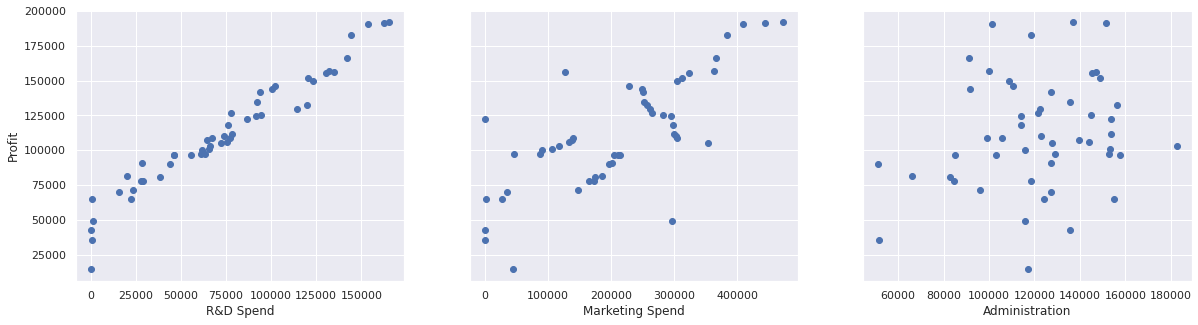

In [14]:
fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(20,5)

ax[0].scatter(X_numeric_reg['R&D Spend'], y_reg)
ax[0].set_xlabel('R&D Spend')
ax[0].set_ylabel('Profit')
ax[1].scatter(X_numeric_reg['Marketing Spend'], y_reg)
ax[1].set_xlabel('Marketing Spend')
ax[2].scatter(X_numeric_reg['Administration'], y_reg)
ax[2].set_xlabel('Administration')

plt.show()

Correlation and F-score of 'R&D Spend' and 'Marketing Spend' are very high relative to the others. Moreover, their p-value are very small (<0.01). Thus, we can conclude that those 2 features are much more important than 'Adminstration'.

### Next, I'll try non-linear transformation of 'R&D Spend' and see what will happen. <br>
I will transform 'R&D Spend' using this non-linear function: 

$$f(x) = ln(x+1)$$

Now, we introduce non-linear relationship between non-linearly transformed R&D Spend(namely 'Non-linear R&D') and 'Profit'.

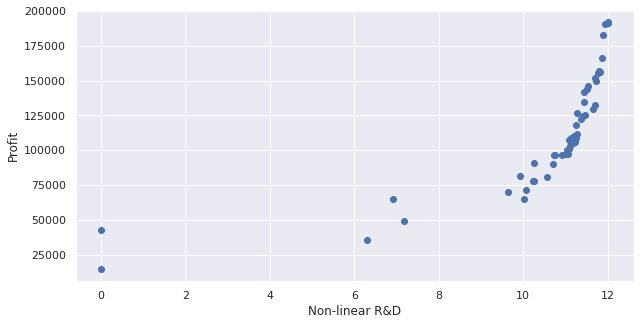

In [15]:
# Non-linearly transform
X_numeric_reg_copy = X_numeric_reg.copy()
X_numeric_reg_copy['Non-linear R&D'] = X_numeric_reg_copy['R&D Spend'].apply(lambda x:np.log(x+1))

plt.figure(figsize=(10,5))
plt.scatter(X_numeric_reg_copy['Non-linear R&D'], y_reg)
plt.xlabel('Non-linear R&D')
plt.ylabel('Profit')
plt.show()

In [16]:
f_test(X_numeric_reg_copy, y_reg, target='Profit', mode='pearsonr')

,pearsonr,F-score,p-value
R&D Spend,0.972900,849.788904,3.500322e-32
Administration,0.200717,2.014960,1.622174e-01
Marketing Spend,0.747766,60.881454,4.381073e-10
Non-linear R&D,0.718622,51.259294,4.188324e-09


We see that after we non-linearly transform 'R&D Spend' into 'Non-linear R&D'. Its F-score decreases very quickly and its p-value also increases. It's because "Pearson" correlation is a statistic that measures **linear correlation** between two variables X and Y.

### Spearman's rank correlation coefficient <br>
is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described in a **monotonic function**.

While Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

In [17]:
f_test(X_numeric_reg_copy, y_reg, target='Profit', mode='spearmanr')

,spearman,F-score,p-value
R&D Spend,0.989844,2327.125145,2.492446e-42
Administration,0.168595,1.404288,2.418409e-01
Marketing Spend,0.721366,52.076855,3.427709e-09
Non-linear R&D,0.989844,2327.125145,2.492446e-42


Now we see that spearman's rank gives "R&D Spend" and "Non-linear R&D" exact same coefficient.

___

## 1.2) Numerical Input, Categorical Output

- ANOVA correlation coefficient (linear) -> [sklearn.feature_selection.f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html "Compute the ANOVA F-value for the provided sample.")<br>
- Kendall’s rank coefficient (nonlinear) -> [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)<br>

Note: Kendall does assume that the categorical variable is ordinal. <br>

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

F_score, p_value = f_classif(X_numeric_class, y_class)

df = pd.DataFrame([F_score,p_value], index=['F-score','p-value'], columns=X_numeric_class.columns).T
df

,F-score,p-value
enrollee_id,47.004194,7.299229e-12
city_development_index,2531.716218,0.000000e+00
training_hours,8.922761,2.819949e-03


## 1.3)Categorical Input, Categorical Output

- Chi-Squared test -> [sklearn.feature_selection.chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
- Mutual Information, Information gain -> [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) for a discrete target variable,  [sklearn.feature_selection.mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) for a continuous target variable.

### Chi-square test <br>
If you don't familiar with Chi-square testing, this [link](https://www.youtube.com/watch?v=VskmMgXmkMQ) have a great, brief explanation for you!

In [19]:
from sklearn.feature_selection import chi2

X_category_dummies = pd.get_dummies(X_category_class)

score, pval = chi2(X_category_dummies, y_class)
feature_importance_chi2 = pd.Series(score, index=X_category_dummies.columns)

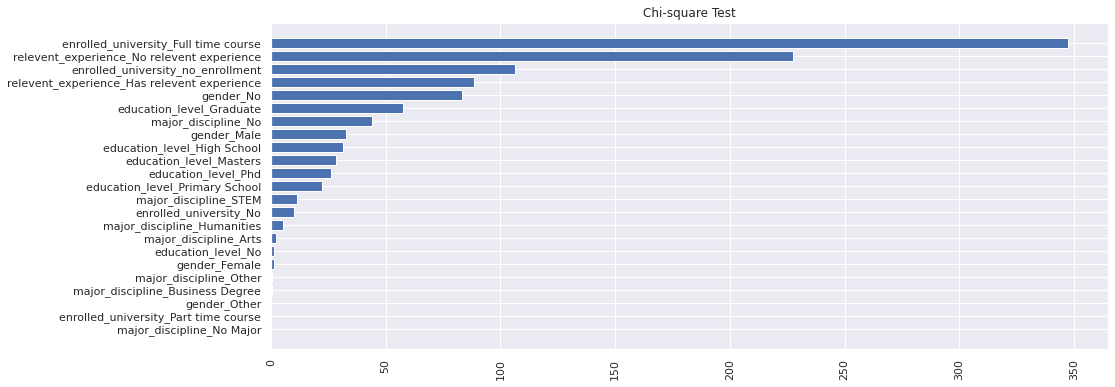

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
ax.barh(feature_importance_chi2.sort_values().index, feature_importance_chi2.sort_values().values)
plt.xticks(rotation=90)
plt.title('Chi-square Test')
plt.show()

### Information gain <br>

In [21]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X_category_dummies, y_class)

feature_importance_Ig = pd.Series(importance, index=X_category_dummies.columns)

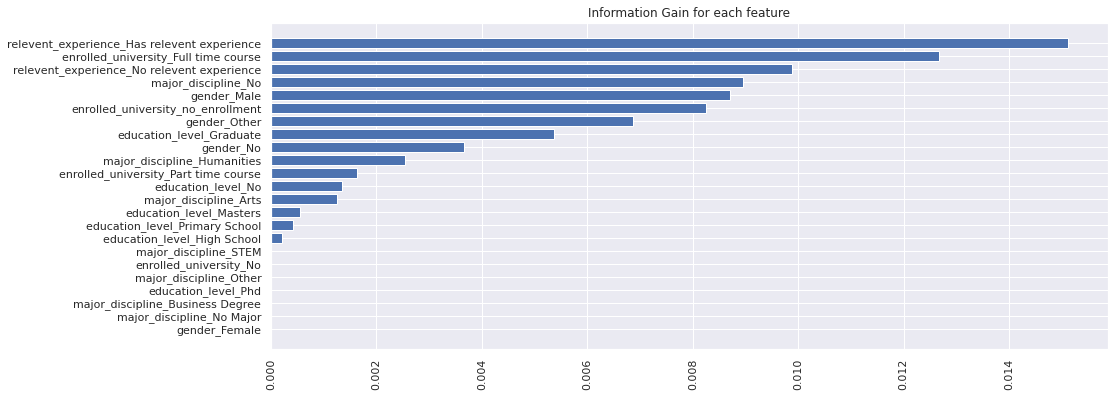

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
ax.barh(feature_importance_Ig.sort_values().index, feature_importance_Ig.sort_values().values)
plt.xticks(rotation=90)
plt.title('Information Gain for each feature')
plt.show()

---

# 2) Wrapper methods

## 2.1) Forward selection
The procedure starts with an empty set of features(reduced set). The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the that set.

## 2.2) Backward elimination
The procedure starts with the full set of features. At each step, it removes the worst attribute remaining in the set.

## 2.3) Recursive feature elimination (RFE)<br>
is a feature selection method that recursively fits a model and removes the weakest feature until the specified number of features is reached. Features are ranked by the model’s coef\_ or feature\_importances\_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model. The choice of model does not matter too much as long as it is skillful and consistent.

sklearn.feature_selection.RFE  
    - .ranking_ attribute that gives a rank of each feature 
    - .support_ attribute that is mark True for selected features and False otherwise.

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

def do_RFE(X_category, X_numeric, y, n, estimator):
    
    X = pd.concat([X_category, X_numeric], axis=1)

    rfe = RFE(estimator, n_features_to_select=n).fit(X, y)
    
    return sorted([(x,y) for (y,x) in list(zip(X.columns,rfe.ranking_))]), X.columns[rfe.support_]

In [24]:
# "HR analytics" dataset classification problem
rank, selected_features = do_RFE(pd.get_dummies(X_category_class), X_numeric_class, y_class, 20, LogisticRegression())
selected_features

Index(['gender_Male', 'gender_No', 'gender_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_No', 'education_level_Primary School',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No',
       'major_discipline_Other', 'major_discipline_STEM',
       'city_development_index'],
      dtype='object')

In [25]:
# "50-Startups" dataset regression problem
rank, selected_features = do_RFE(pd.get_dummies(X_category_reg), X_numeric_reg, y_reg, 1, RandomForestRegressor())
rank

[(1, 'R&D Spend'),
 (2, 'Marketing Spend'),
 (3, 'Administration'),
 (4, 'New York'),
 (5, 'California'),
 (6, 'Florida')]


---

# 3) Embedded methods



## 3.1) Regularization <br>

In Linear Regression, the predicted values($\hat{y}$) are calculated by $\hat{y} = XW_1+W_0$ 
where $X$ is data matrix, $W_1$ is a weight vector($W_1 = [w_1,w_2,w_3,...w_p]$), $W_0$ is a bias.
We obtain $W_1$ and $W_0$ by trying to minimize sum of square residuals to find the best fit line. i.e. minimizing 
$$\sum_{i=1}^{n}(\underbrace{y_i-\hat{y_i}}_{residual})^{2}$$

### L1-Regularization

LASSO(Least Absolute Shrinkage and Selection operator)
minimzes $$\sum_{i=1}^{n}(y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^{p}|w_j|$$
The second term is called penalization term. It's there to prevent overfitting. In the fitting process, LASSO automatically sets some coefficients to zero. Generally, these are the weak predictor(s). This is a form of built-in(embedded) feature-selection. The variables with non-zero coefficients were the ones selected.
Since all the coefficients will be multiplied by the same number ($\alpha$),it's important that all the predictors are on the same scale. Otherwise, some variables will be unfairly penalized more than others. 

In [26]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler

def get_embedded_report(X_numeric, X_category, y, estimator):
    
    # First normalize our predictors
    X_numeric_scaled = StandardScaler().fit_transform(X_numeric)
    y_scaled     = StandardScaler().fit_transform(y.values.reshape(-1,1))

    # Save the columns name into variable named 'features'
    X_category_dummies = pd.get_dummies(X_category)
    features = list(X_numeric_reg.columns) + list(X_category_dummies.columns)

    # Fit the regressor
    X = np.concatenate([X_numeric_scaled, X_category_dummies.values], axis=1)

    model = estimator.fit(X, y_scaled)
    try:
        c = model.coef_
    except:
        c = model.feature_importances_
    finally:
        return c, features

In [27]:
# Using L1-regularization
coef, features = get_embedded_report(X_numeric_reg, X_category_reg, y_reg, Lasso(alpha=0.1))
list(zip(features,coef))

[('R&D Spend', 0.849256095682484),
 ('Administration', -0.0),
 ('Marketing Spend', 0.032693579958810816),
 ('California', -0.0),
 ('Florida', 0.0),
 ('New York', -0.0)]

In [28]:
# Using L2-regularization
coef, features = get_embedded_report(X_numeric_reg, X_category_reg, y_reg, Ridge())
list(zip(features,coef[0]))

[('R&D Spend', 0.8780288777147082),
 ('Administration', -0.008085007680925026),
 ('Marketing Spend', 0.10909503223068648),
 ('California', -0.0024425845607658667),
 ('Florida', 0.001444242340860628),
 ('New York', 0.00099834221990486)]

In [29]:
# Using feature_importances_'s DecisionTree
from sklearn.tree import DecisionTreeRegressor

coef, features = get_embedded_report(X_numeric_reg, X_category_reg, y_reg, DecisionTreeRegressor())
list(zip(features,coef))

[('R&D Spend', 0.9712067573139606),
 ('Administration', 0.001647612234784569),
 ('Marketing Spend', 0.021591623580476164),
 ('California', 0.0008685200514716327),
 ('Florida', 0.0046305909408538674),
 ('New York', 5.489587845315638e-05)]

---
## There're more useful tools in sklearn.feature_selection
- SelectPercentile(score_func ex: f_classif, percentile: int) : Select features according to a percentile of the highest scores.
- SelectKBest(score_func, k: int,"all") : Select features according to the k highest scores.
- VarianceThreshold(threshold: Float) : Feature selector that removes all low-variance features.

***Thank you for checking this notebook!! If there're mistakes, please let me know. <br> Feel free to give any advices in the comment section :)***

---

# Reference
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ <br>
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ <br>
- https://www.datacamp.com/community/tutorials/feature-selection-python <br>
